In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import Pipeline

# Exploratory Data Analysis

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING MAY/DAY1_HOUSING_PRICE_PREDICTION/train.csv")
df = raw_data.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Description

MSSubClass: Identifies the type of dwelling involved in the sale.

    20	1-STORY 1946 & NEWER ALL STYLES
    30	1-STORY 1945 & OLDER
    40	1-STORY W/FINISHED ATTIC ALL AGES
    45	1-1/2 STORY - UNFINISHED ALL AGES
    50	1-1/2 STORY FINISHED ALL AGES
    60	2-STORY 1946 & NEWER
    70	2-STORY 1945 & OLDER
    75	2-1/2 STORY ALL AGES
    80	SPLIT OR MULTI-LEVEL
    85	SPLIT FOYER
    90	DUPLEX - ALL STYLES AND AGES
    120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150	1-1/2 STORY PUD - ALL AGES
    160	2-STORY PUD - 1946 & NEWER
    180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

    A	Agriculture
    C	Commercial
    FV	Floating Village Residential
    I	Industrial
    RH	Residential High Density
    RL	Residential Low Density
    RP	Residential Low Density Park
    RM	Residential Medium Density

LotFrontage:

    Linear feet of street connected to property

LotArea:

    Lot size in square feet

Street: Type of road access to property

    Grvl	Gravel
    Pave	Paved

Alley: Type of alley access to property

    Grvl	Gravel
    Pave	Paved
    NA 	No alley access

LotShape: General shape of property

    Reg	Regular
    IR1	Slightly irregular
    IR2	Moderately Irregular
    IR3	Irregular
       
LandContour: Flatness of the property

    Lvl	Near Flat/Level
    Bnk	Banked - Quick and significant rise from street grade to building
    HLS	Hillside - Significant slope from side to side
    Low	Depression

Utilities: Type of utilities available

    AllPub	All public Utilities (E,G,W,& S)
    NoSewr	Electricity, Gas, and Water (Septic Tank)
    NoSeWa	Electricity and Gas Only
    ELO	Electricity only

LotConfig: Lot configuration

    Inside	Inside lot
    Corner	Corner lot
    CulDSac	Cul-de-sac
    FR2	Frontage on 2 sides of property
    FR3	Frontage on 3 sides of property

LandSlope: Slope of property

    Gtl	Gentle slope
    Mod	Moderate Slope
    Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

    Blmngtn	Bloomington Heights
    Blueste	Bluestem
    BrDale	Briardale
    BrkSide	Brookside
    ClearCr	Clear Creek
    CollgCr	College Creek
    Crawfor	Crawford
    Edwards	Edwards
    Gilbert	Gilbert
    IDOTRR	Iowa DOT and Rail Road
    MeadowV	Meadow Village
    Mitchel	Mitchell
    Names	North Ames
    NoRidge	Northridge
    NPkVill	Northpark Villa
    NridgHt	Northridge Heights
    NWAmes	Northwest Ames
    OldTown	Old Town
    SWISU	South & West of Iowa State University
    Sawyer	Sawyer
    SawyerW	Sawyer West
    Somerst	Somerset
    StoneBr	Stone Brook
    Timber	Timberland
    Veenker	Veenker

Condition1: Proximity to various conditions

    Artery	Adjacent to arterial street
    Feedr	Adjacent to feeder street
    Norm	Normal
    RRNn	Within 200' of North-South Railroad
    RRAn	Adjacent to North-South Railroad
    PosN	Near positive off-site feature--park, greenbelt, etc.
    PosA	Adjacent to postive off-site feature
    RRNe	Within 200' of East-West Railroad
    RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

    Artery	Adjacent to arterial street
    Feedr	Adjacent to feeder street
    Norm	Normal
    RRNn	Within 200' of North-South Railroad
    RRAn	Adjacent to North-South Railroad
    PosN	Near positive off-site feature--park, greenbelt, etc.
    PosA	Adjacent to postive off-site feature
    RRNe	Within 200' of East-West Railroad
    RRAe	Adjacent to East-West Railroad

BldgType: Type of dwelling

    1Fam	Single-family Detached
    2FmCon	Two-family Conversion; originally built as one-family dwelling
    Duplx	Duplex
    TwnhsE	Townhouse End Unit
    TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

    1Story	One story
    1.5Fin	One and one-half story: 2nd level finished
    1.5Unf	One and one-half story: 2nd level unfinished
    2Story	Two story
    2.5Fin	Two and one-half story: 2nd level finished
    2.5Unf	Two and one-half story: 2nd level unfinished
    SFoyer	Split Foyer
    SLvl	Split Level

OverallQual: Rates the overall material and finish of the house

    10	Very Excellent
    9	Excellent
    8	Very Good
    7	Good
    6	Above Average
    5	Average
    4	Below Average
    3	Fair
    2	Poor
    1	Very Poor

OverallCond: Rates the overall condition of the house

    10	Very Excellent
    9	Excellent
    8	Very Good
    7	Good
    6	Above Average
    5	Average
    4	Below Average
    3	Fair
    2	Poor
    1	Very Poor

YearBuilt:
    
    Original construction date

YearRemodAdd:

    Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

    Flat	Flat
    Gable	Gable
    Gambrel	Gabrel (Barn)
    Hip	Hip
    Mansard	Mansard
    Shed	Shed

RoofMatl: Roof material

    ClyTile	Clay or Tile
    CompShg	Standard (Composite) Shingle
    Membran	Membrane
    Metal	Metal
    Roll	Roll
    Tar&Grv	Gravel & Tar
    WdShake	Wood Shakes
    WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

    AsbShng	Asbestos Shingles
    AsphShn	Asphalt Shingles
    BrkComm	Brick Common
    BrkFace	Brick Face
    CBlock	Cinder Block
    CemntBd	Cement Board
    HdBoard	Hard Board
    ImStucc	Imitation Stucco
    MetalSd	Metal Siding
    Other	Other
    Plywood	Plywood
    PreCast	PreCast
    Stone	Stone
    Stucco	Stucco
    VinylSd	Vinyl Siding
    Wd Sdng	Wood Siding
    WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

    AsbShng	Asbestos Shingles
    AsphShn	Asphalt Shingles
    BrkComm	Brick Common
    BrkFace	Brick Face
    CBlock	Cinder Block
    CemntBd	Cement Board
    HdBoard	Hard Board
    ImStucc	Imitation Stucco
    MetalSd	Metal Siding
    Other	Other
    Plywood	Plywood
    PreCast	PreCast
    Stone	Stone
    Stucco	Stucco
    VinylSd	Vinyl Siding
    Wd Sdng	Wood Siding
    WdShing	Wood Shingles

MasVnrType: Masonry veneer type

    BrkCmn	Brick Common
    BrkFace	Brick Face
    CBlock	Cinder Block
    None	None
    Stone	Stone

MasVnrArea:
    
    Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

    Ex	Excellent
    Gd	Good
    TA	Average/Typical
    Fa	Fair
    Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

    Ex	Excellent
    Gd	Good
    TA	Average/Typical
    Fa	Fair
    Po	Poor

Foundation: Type of foundation

    BrkTil	Brick & Tile
    CBlock	Cinder Block
    PConc	Poured Contrete
    Slab	Slab
    Stone	Stone
    Wood	Wood

BsmtQual: Evaluates the height of the basement

    Ex	Excellent (100+ inches)
    Gd	Good (90-99 inches)
    TA	Typical (80-89 inches)
    Fa	Fair (70-79 inches)
    Po	Poor (<70 inches)
    NA	No Basement

BsmtCond: Evaluates the general condition of the basement

    Ex	Excellent
    Gd	Good
    TA	Typical - slight dampness allowed
    Fa	Fair - dampness or some cracking or settling
    Po	Poor - Severe cracking, settling, or wetness
    NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

    Gd	Good Exposure
    Av	Average Exposure (split levels or foyers typically score average or above)
    Mn	Mimimum Exposure
    No	No Exposure
    NA	No Basement

BsmtFinType1: Rating of basement finished area

    GLQ	Good Living Quarters
    ALQ	Average Living Quarters
    BLQ	Below Average Living Quarters
    Rec	Average Rec Room
    LwQ	Low Quality
    Unf	Unfinshed
    NA	No Basement

BsmtFinSF1:

    Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

    GLQ	Good Living Quarters
    ALQ	Average Living Quarters
    BLQ	Below Average Living Quarters
    Rec	Average Rec Room
    LwQ	Low Quality
    Unf	Unfinshed
    NA	No Basement

BsmtFinSF2:

    Type 2 finished square feet

BsmtUnfSF:

    Unfinished square feet of basement area

TotalBsmtSF:

    Total square feet of basement area

Heating: Type of heating

    Floor	Floor Furnace
    GasA	Gas forced warm air furnace
    GasW	Gas hot water or steam heat
    Grav	Gravity furnace
    OthW	Hot water or steam heat other than gas
    Wall	Wall furnace

HeatingQC: Heating quality and condition

    Ex	Excellent
    Gd	Good
    TA	Average/Typical
    Fa	Fair
    Po	Poor

CentralAir: Central air conditioning

    N	No
    Y	Yes

Electrical: Electrical system

    SBrkr	Standard Circuit Breakers & Romex
    FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
    FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
    FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
    Mix	Mixed

1stFlrSF:

    First Floor square feet

2ndFlrSF:

    Second floor square feet

LowQualFinSF:

    Low quality finished square feet (all floors)

GrLivArea:

    Above grade (ground) living area square feet

BsmtFullBath:

    Basement full bathrooms

BsmtHalfBath:

    Basement half bathrooms

FullBath:

    Full bathrooms above grade

HalfBath:

    Half baths above grade

Bedroom:

    Bedrooms above grade (does NOT include basement bedrooms)

Kitchen:

    Kitchens above grade

KitchenQual: Kitchen quality

    Ex	Excellent
    Gd	Good
    TA	Typical/Average
    Fa	Fair
    Po	Poor
    
TotRmsAbvGrd:

    Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

    Typ	Typical Functionality
    Min1	Minor Deductions 1
    Min2	Minor Deductions 2
    Mod	Moderate Deductions
    Maj1	Major Deductions 1
    Maj2	Major Deductions 2
    Sev	Severely Damaged
    Sal	Salvage only

Fireplaces:

    Number of fireplaces

FireplaceQu: Fireplace quality

    Ex	Excellent - Exceptional Masonry Fireplace
    Gd	Good - Masonry Fireplace in main level
    TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    Fa	Fair - Prefabricated Fireplace in basement
    Po	Poor - Ben Franklin Stove
    NA	No Fireplace

GarageType: Garage location

    2Types	More than one type of garage
    Attchd	Attached to home
    Basment	Basement Garage
    BuiltIn	Built-In (Garage part of house - typically has room above garage)
    CarPort	Car Port
    Detchd	Detached from home
    NA	No Garage

GarageYrBlt:

    Year garage was built

GarageFinish: Interior finish of the garage

    Fin	Finished
    RFn	Rough Finished
    Unf	Unfinished
    NA	No Garage

GarageCars:

    Size of garage in car capacity

GarageArea:

    Size of garage in square feet

GarageQual: Garage quality

    Ex	Excellent
    Gd	Good
    TA	Typical/Average
    Fa	Fair
    Po	Poor
    NA	No Garage

GarageCond: Garage condition

    Ex	Excellent
    Gd	Good
    TA	Typical/Average
    Fa	Fair
    Po	Poor
    NA	No Garage

PavedDrive: Paved driveway

    Y	Paved
    P	Partial Pavement
    N	Dirt/Gravel

WoodDeckSF:

    Wood deck area in square feet

OpenPorchSF:

    Open porch area in square feet

EnclosedPorch:

    Enclosed porch area in square feet

3SsnPorch:

    Three season porch area in square feet

ScreenPorch:

    Screen porch area in square feet

PoolArea:

    Pool area in square feet

PoolQC: Pool quality

    Ex	Excellent
    Gd	Good
    TA	Average/Typical
    Fa	Fair
    NA	No Pool

Fence: Fence quality

    GdPrv	Good Privacy
    MnPrv	Minimum Privacy
    GdWo	Good Wood
    MnWw	Minimum Wood/Wire
    NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories

    Elev	Elevator
    Gar2	2nd Garage (if not described in garage section)
    Othr	Other
    Shed	Shed (over 100 SF)
    TenC	Tennis Court
    NA	None

MiscVal:

    $Value of miscellaneous feature

MoSold:

    Month Sold (MM)

YrSold:

    Year Sold (YYYY)

SaleType: Type of sale

    WD 	Warranty Deed - Conventional
    CWD	Warranty Deed - Cash
    VWD	Warranty Deed - VA Loan
    New	Home just constructed and sold
    COD	Court Officer Deed/Estate
    Con	Contract 15% Down payment regular terms
    ConLw	Contract Low Down payment and low interest
    ConLI	Contract Low Interest
    ConLD	Contract Low Down
    Oth	Other

SaleCondition: Condition of sale

    Normal	Normal Sale
    Abnorml	Abnormal Sale -  trade, foreclosure, short sale
    AdjLand	Adjoining Land Purchase
    Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
    Family	Sale between family members
    Partial	Home was not completed when last assessed (associated with New Homes)


## Missing Values

Let us check for missing values.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
print("Missing Values:")
for column in df:
  print (f"{column} {df[column].isnull().sum()} ({df[column].isnull().sum()/len(df[column])*100:.1f}%)")

Missing Values:
Id 0 (0.0%)
MSSubClass 0 (0.0%)
MSZoning 0 (0.0%)
LotFrontage 259 (17.7%)
LotArea 0 (0.0%)
Street 0 (0.0%)
Alley 1369 (93.8%)
LotShape 0 (0.0%)
LandContour 0 (0.0%)
Utilities 0 (0.0%)
LotConfig 0 (0.0%)
LandSlope 0 (0.0%)
Neighborhood 0 (0.0%)
Condition1 0 (0.0%)
Condition2 0 (0.0%)
BldgType 0 (0.0%)
HouseStyle 0 (0.0%)
OverallQual 0 (0.0%)
OverallCond 0 (0.0%)
YearBuilt 0 (0.0%)
YearRemodAdd 0 (0.0%)
RoofStyle 0 (0.0%)
RoofMatl 0 (0.0%)
Exterior1st 0 (0.0%)
Exterior2nd 0 (0.0%)
MasVnrType 872 (59.7%)
MasVnrArea 8 (0.5%)
ExterQual 0 (0.0%)
ExterCond 0 (0.0%)
Foundation 0 (0.0%)
BsmtQual 37 (2.5%)
BsmtCond 37 (2.5%)
BsmtExposure 38 (2.6%)
BsmtFinType1 37 (2.5%)
BsmtFinSF1 0 (0.0%)
BsmtFinType2 38 (2.6%)
BsmtFinSF2 0 (0.0%)
BsmtUnfSF 0 (0.0%)
TotalBsmtSF 0 (0.0%)
Heating 0 (0.0%)
HeatingQC 0 (0.0%)
CentralAir 0 (0.0%)
Electrical 1 (0.1%)
1stFlrSF 0 (0.0%)
2ndFlrSF 0 (0.0%)
LowQualFinSF 0 (0.0%)
GrLivArea 0 (0.0%)
BsmtFullBath 0 (0.0%)
BsmtHalfBath 0 (0.0%)
FullBath 0 (0.0

Many of the columns contain missing values. We need to fill these missing values using proper imputing techniques.

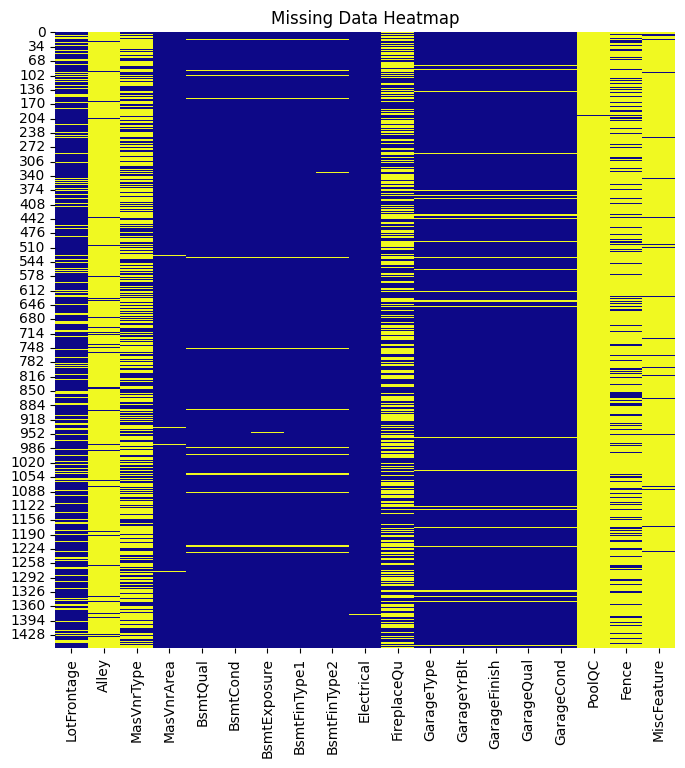

In [ ]:
columns_with_null_values = []
for column in df:
  if df[column].isnull().sum() != 0:
    columns_with_null_values.append(column)

plt.figure(figsize=(8,8))
sns.heatmap(df[columns_with_null_values].isnull(),cmap='plasma', cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

Text(0, 0.5, '# of missing values')

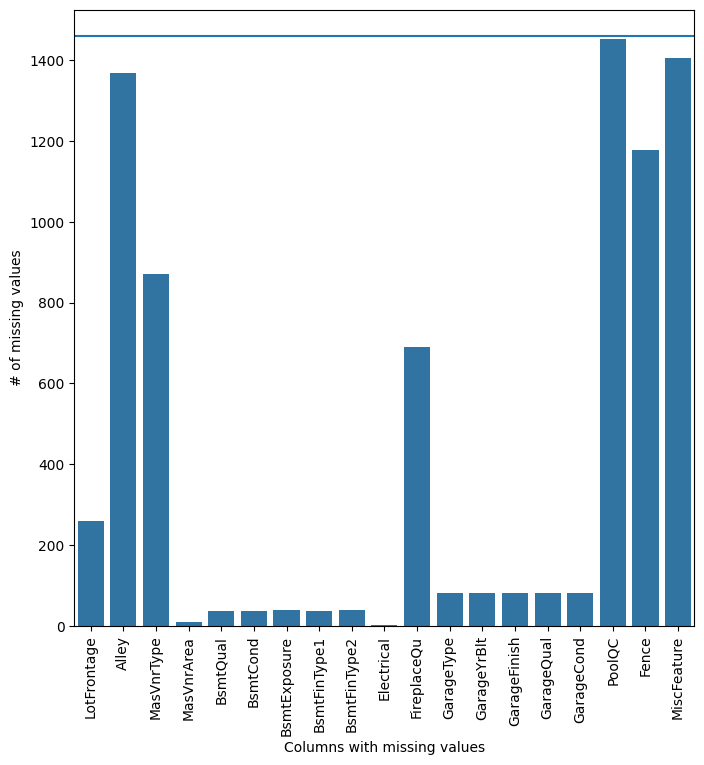

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x = columns_with_null_values, y = [df[column].isnull().sum() for column in columns_with_null_values])
plt.xticks(rotation=90)
plt.axhline(y=1460)
plt.xlabel('Columns with missing values')
plt.ylabel('# of missing values')

From these two graphs, we see that some features contain large amount of missing values. Here, I am assuming a threshold of 80% missing values. Any feature with higher percentage than this threshold will be removed from the dataset.

## Visualizing Numerical Features

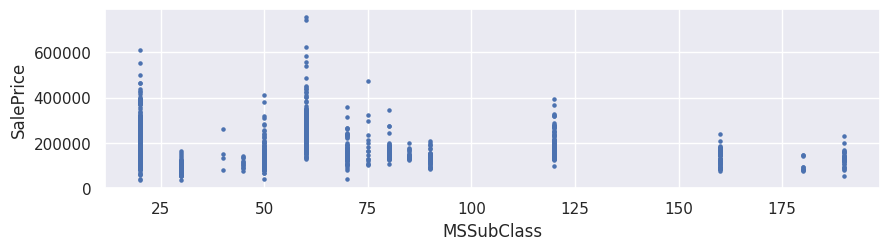

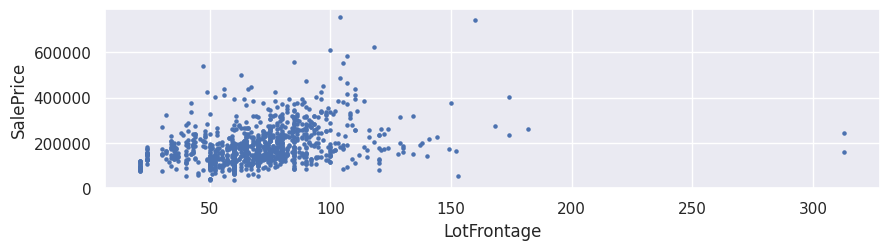

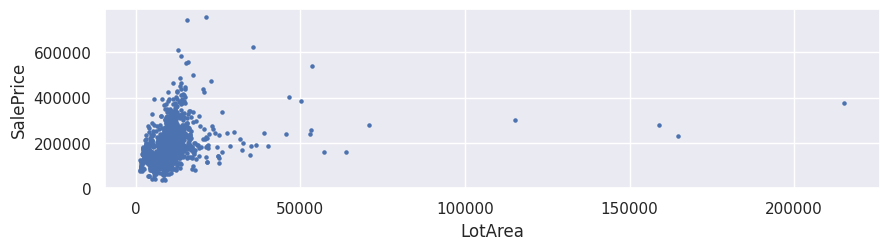

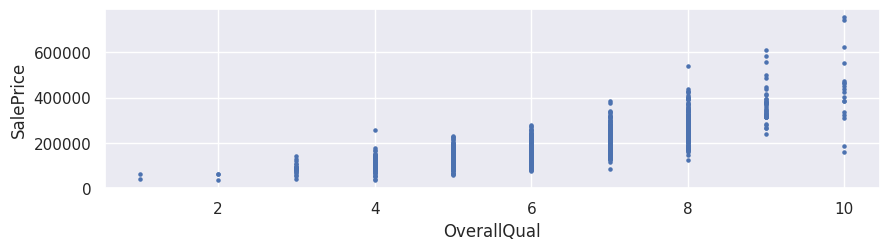

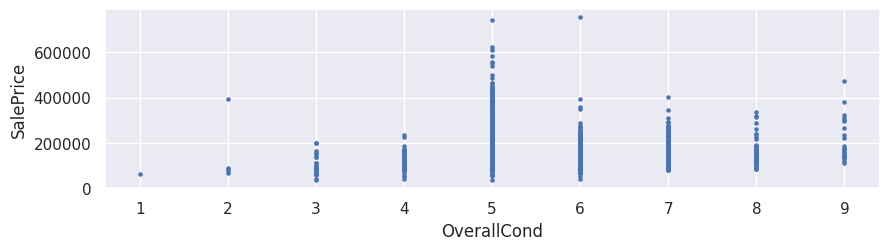

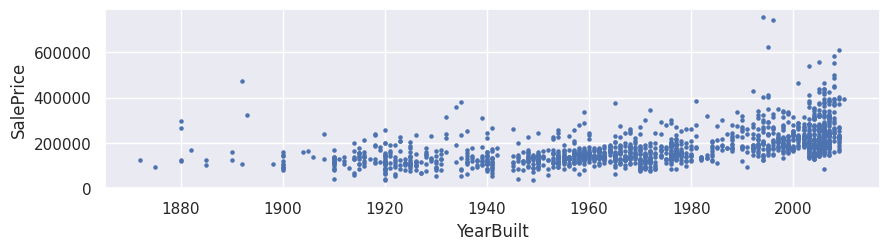

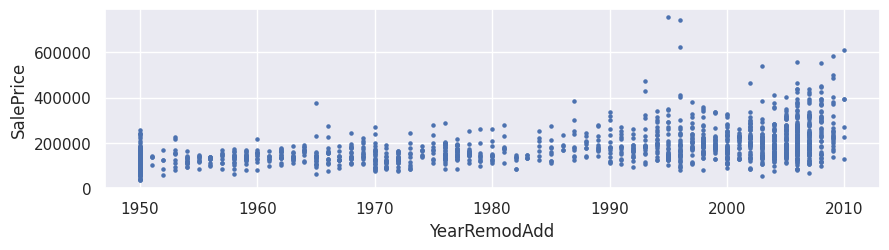

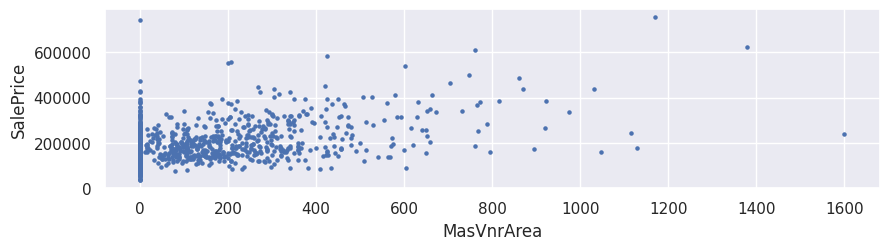

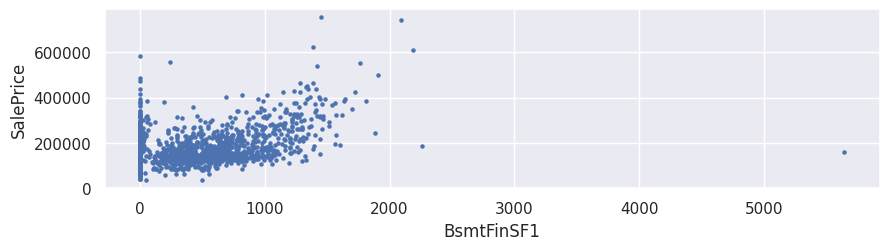

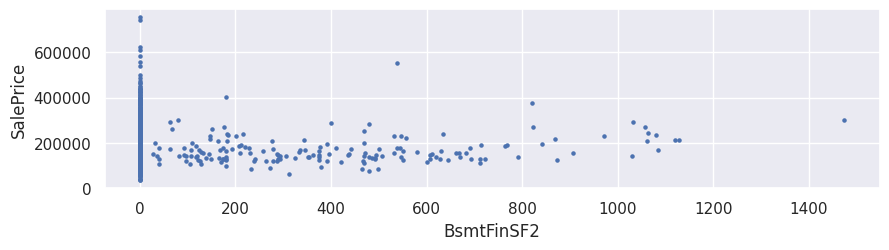

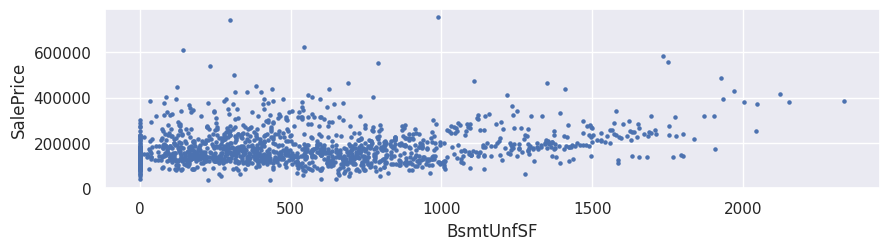

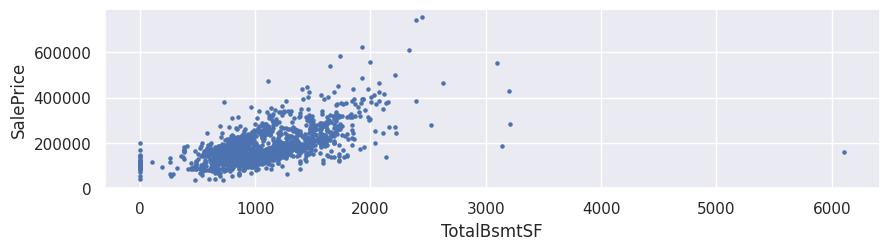

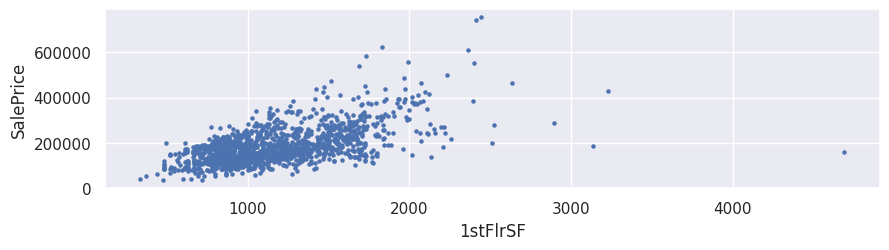

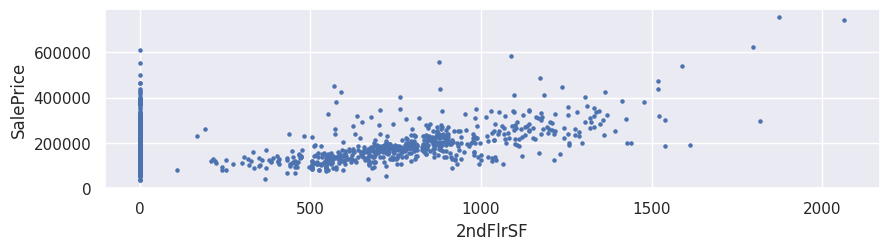

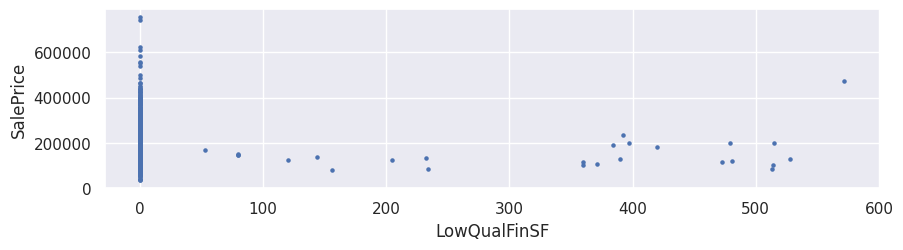

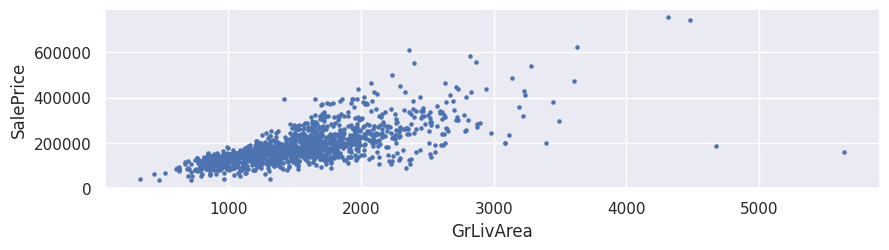

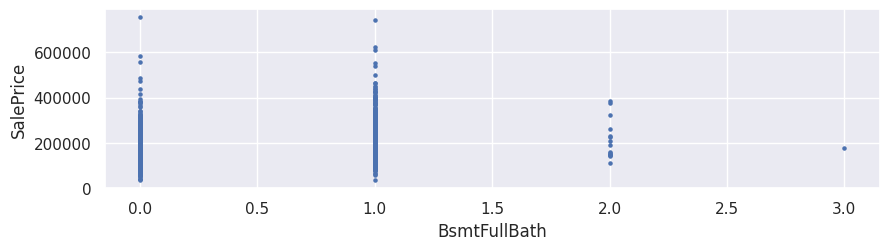

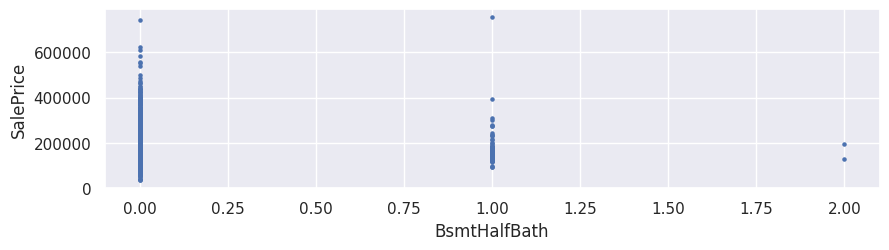

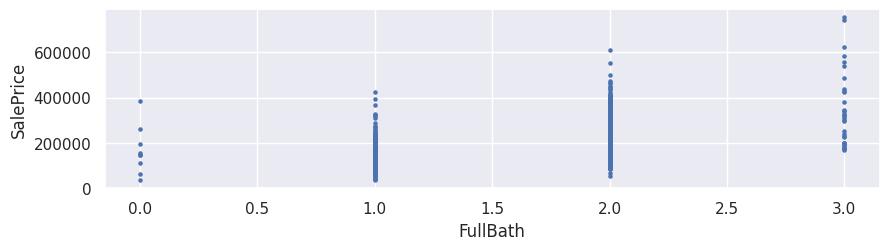

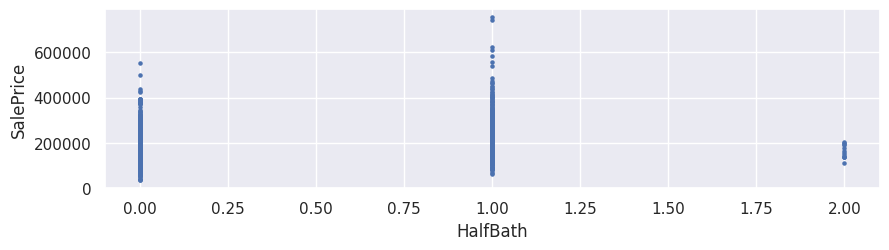

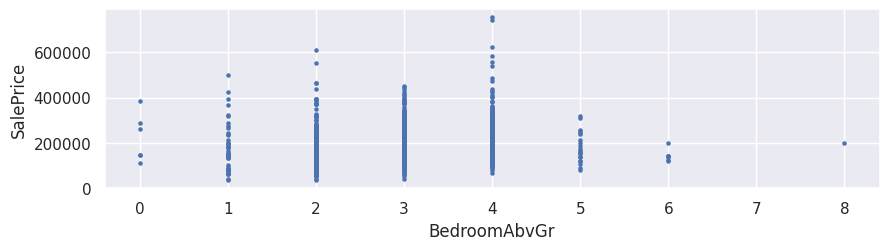

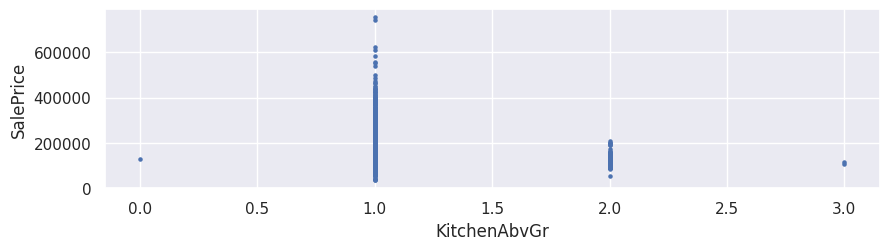

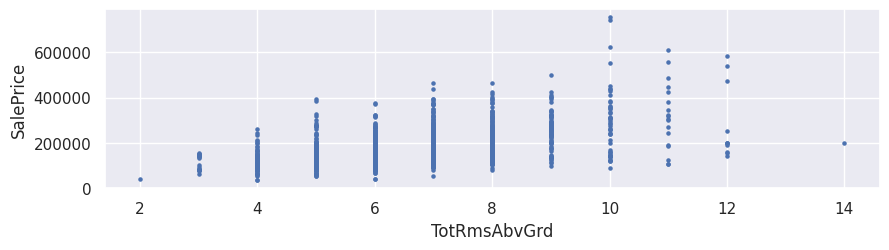

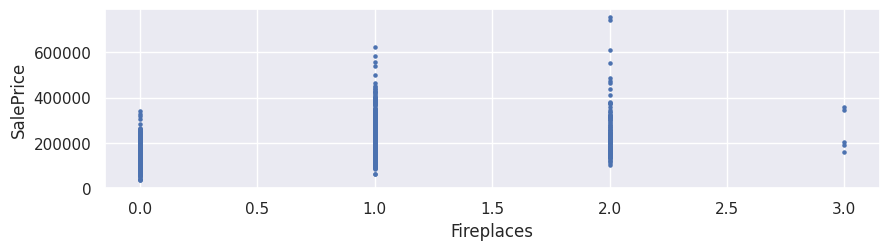

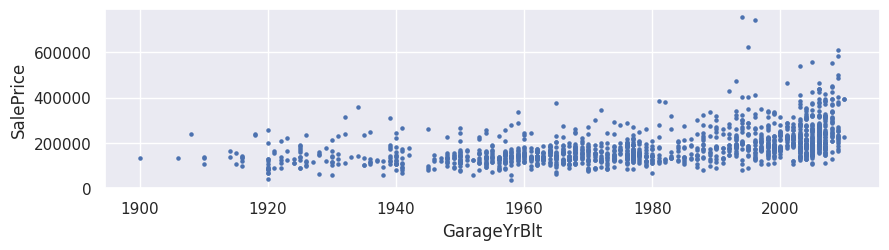

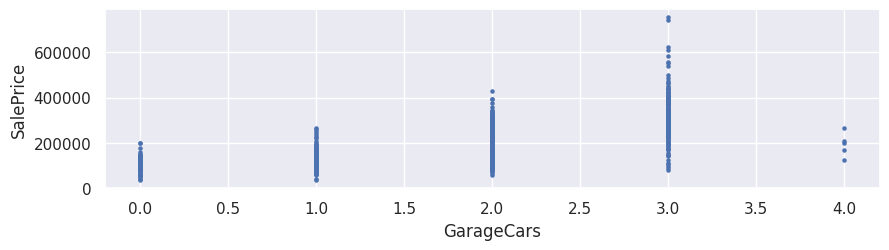

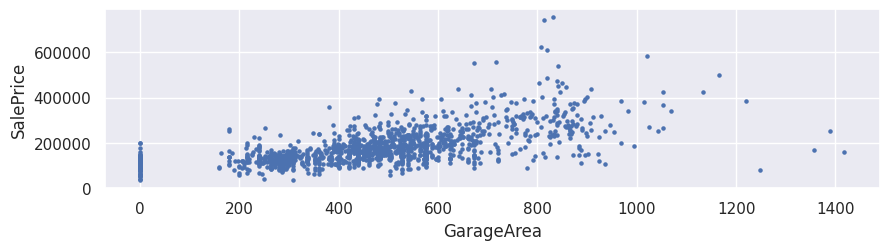

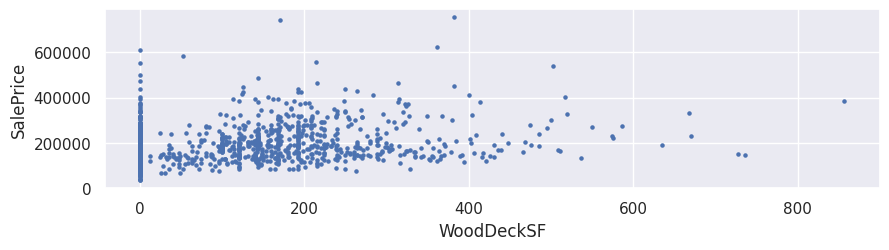

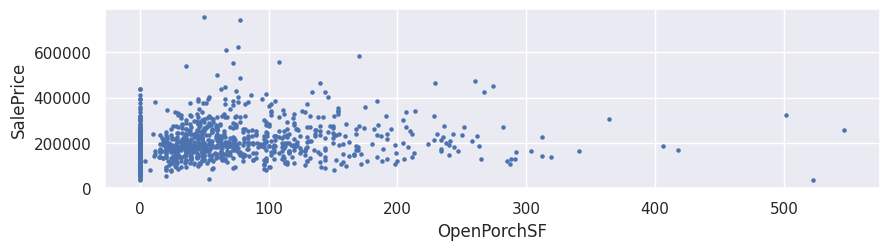

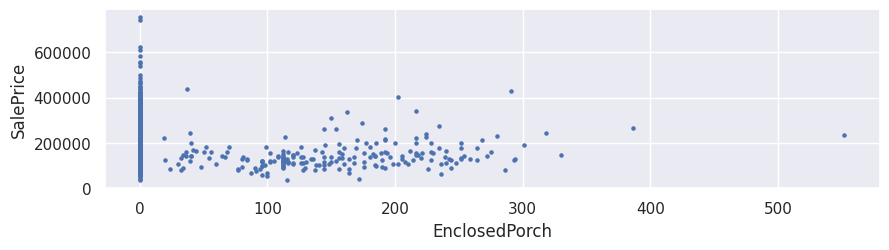

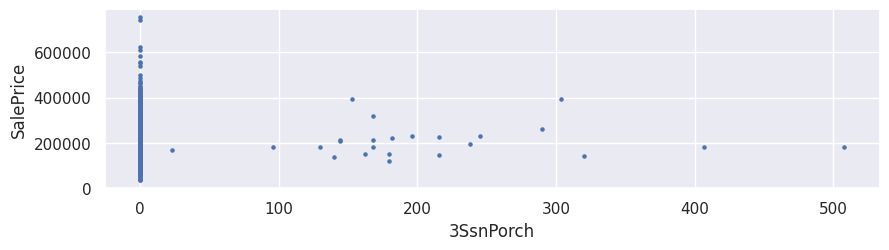

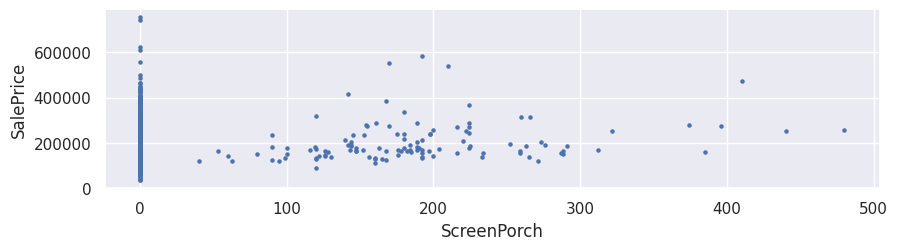

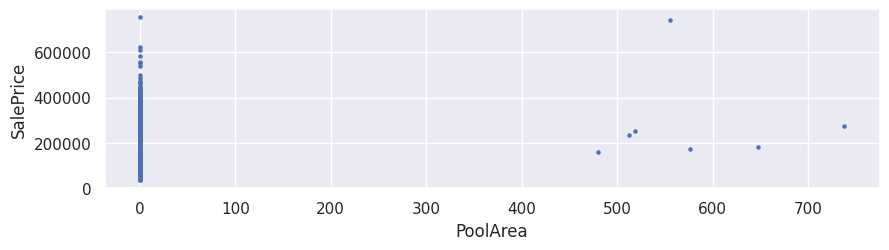

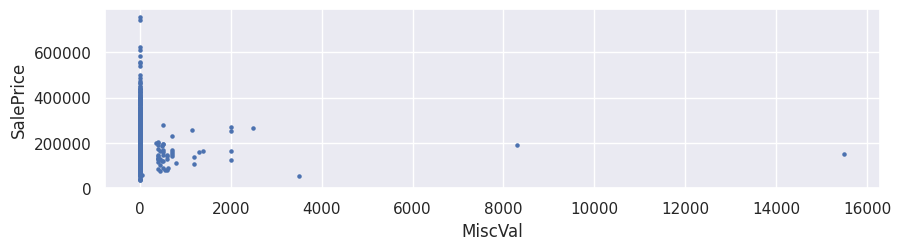

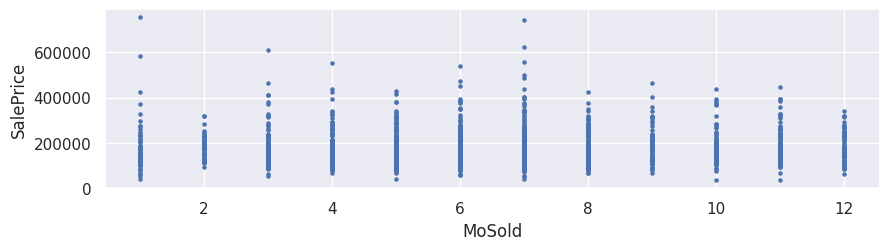

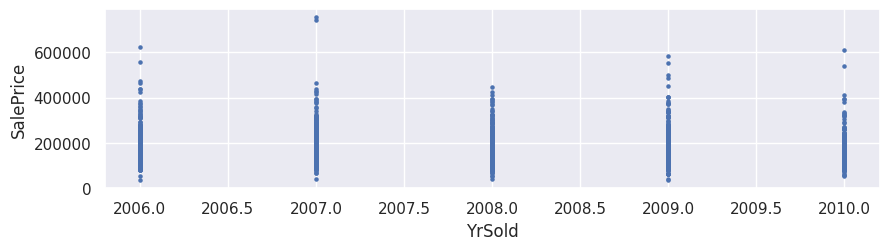

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set()
selector  = make_column_selector

num_col_sel = selector(dtype_exclude='object')
num_col = num_col_sel(df)

for column,i in zip(num_col[1:-1],range(len(num_col[1:-1]))):
    plt.figure(figsize=(10,100))
    plt.subplot(len(num_col[1:-1]),1,i+1)
    plt.scatter(df[column],df['SalePrice'], s=5)
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.show()

plt.tight_layout()

Observations:
1. Some numerical features are continuous (e.g. features related to area), whereas some numerical features are discrete (e.g. Number of bedrooms, bathrooms, year of sale etc.) We need to separately take care of these groups of features in our preprocessing pipeline.
2. Features **MSSubClass** and **MoSold** identify the type of dwelling and the month of sale. Although their values are numerical, there is no ordinal relation between these values as they represent categories. Hence, these features will be treated as a categorical variables.
3. For features representing year i.e. **YearBuilt**, **YearRemodAdd**, **GarageYrBlt** and **YrSold**; we need to transform the year values into age values. E.g. An year value of 1964 will be converted to 2024 (current year) - 1964 = **60**.

## Visualizing Categorical Features

Let us visualize the box plots for categorical features.

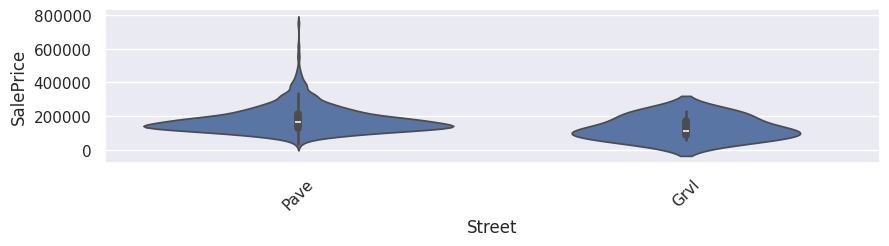

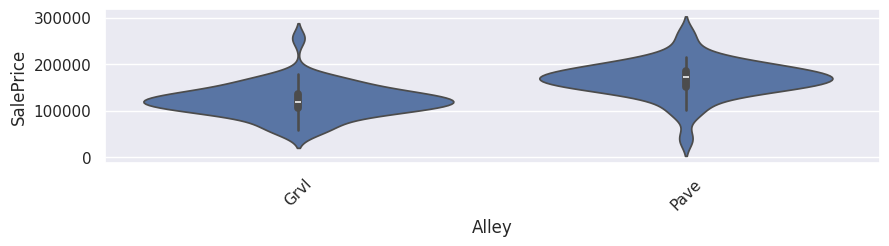

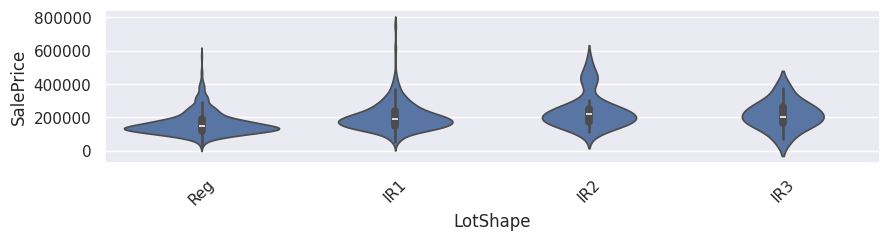

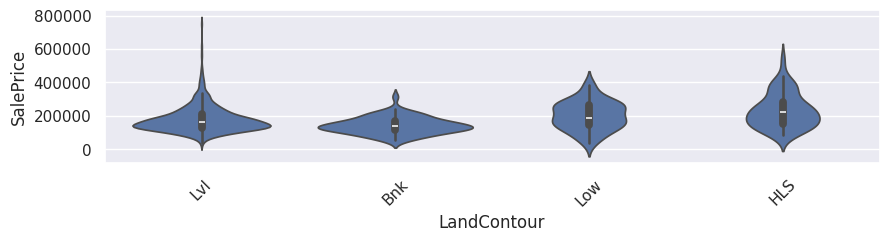

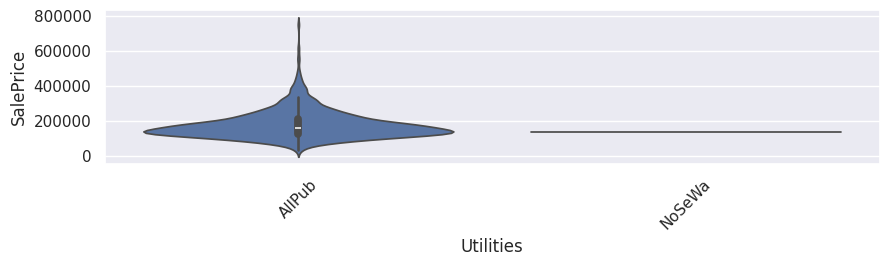

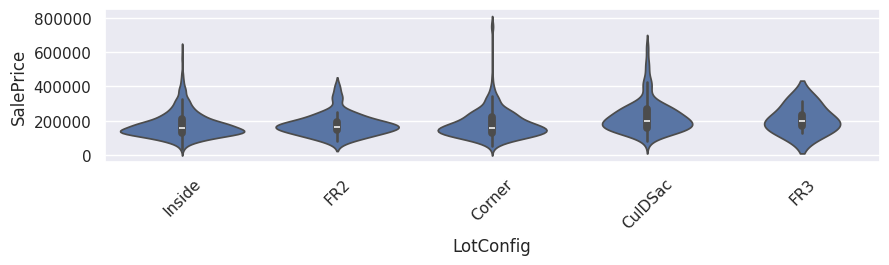

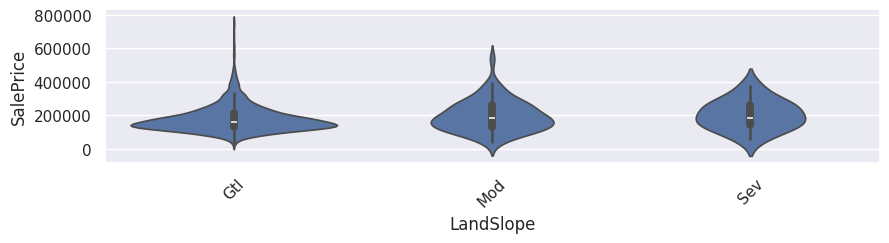

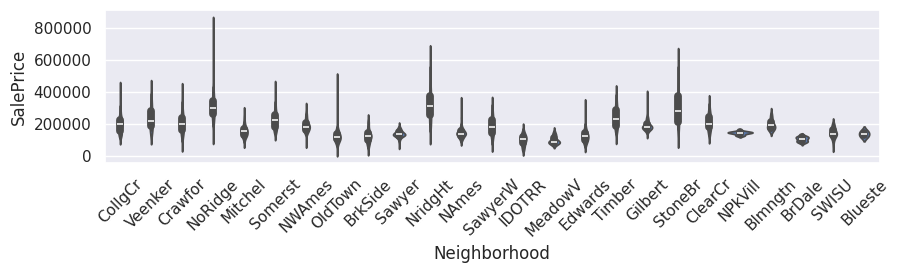

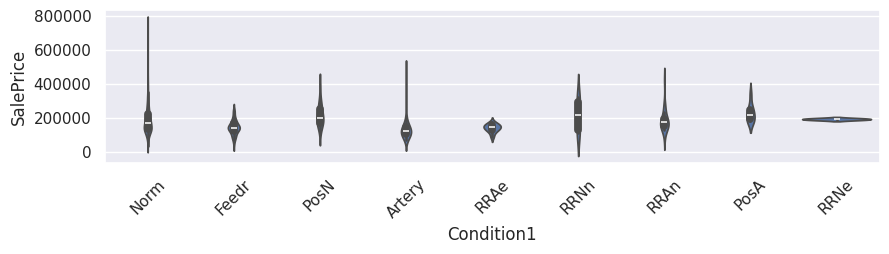

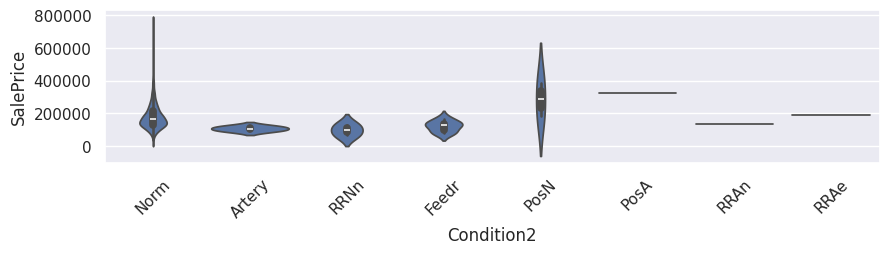

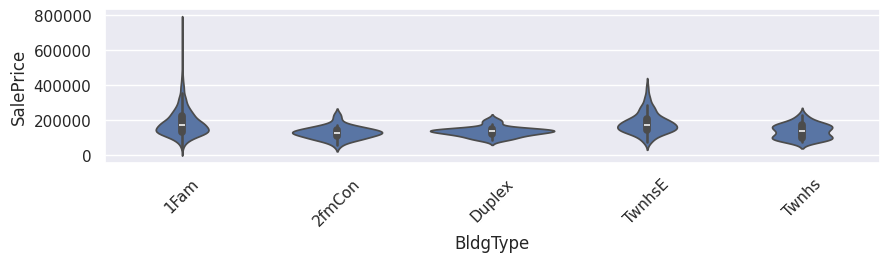

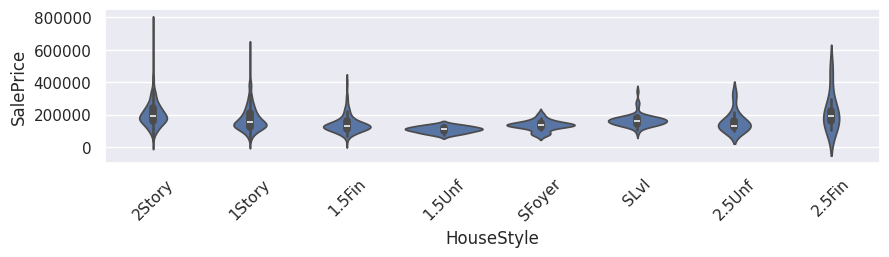

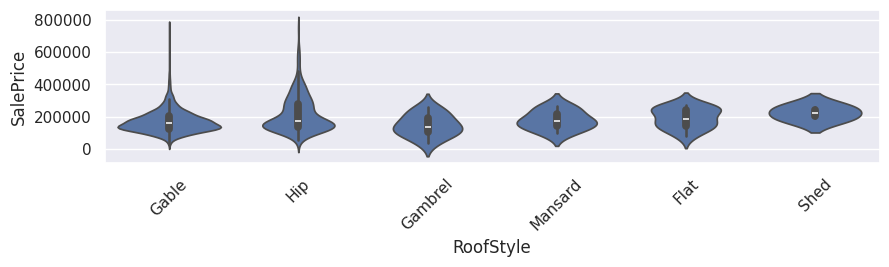

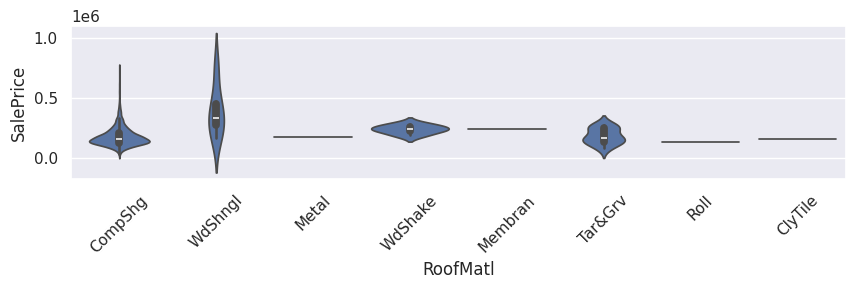

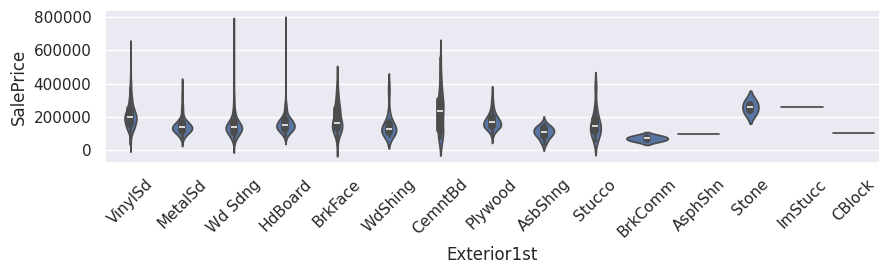

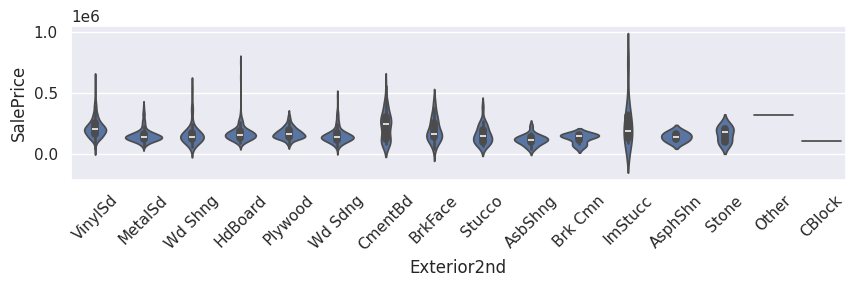

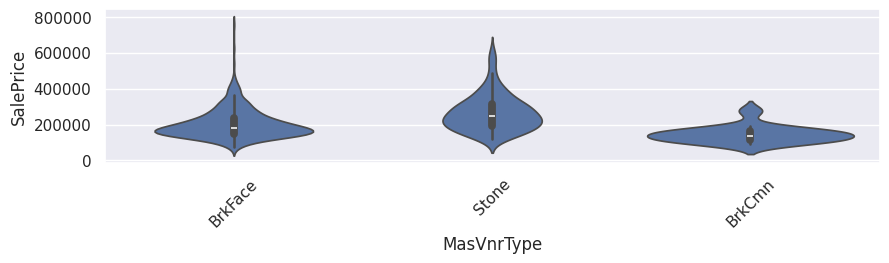

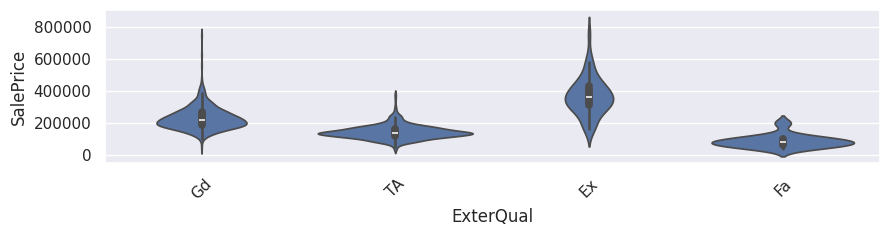

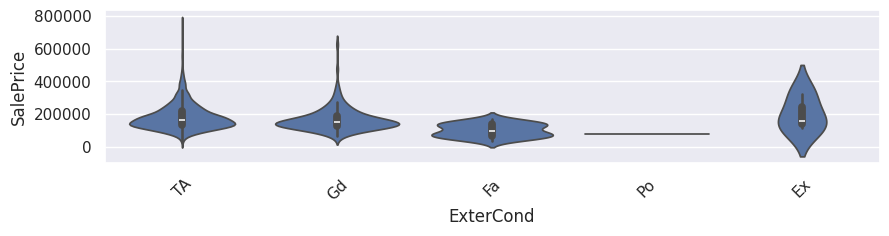

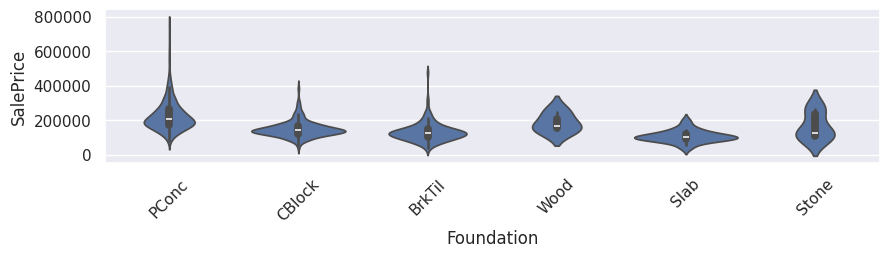

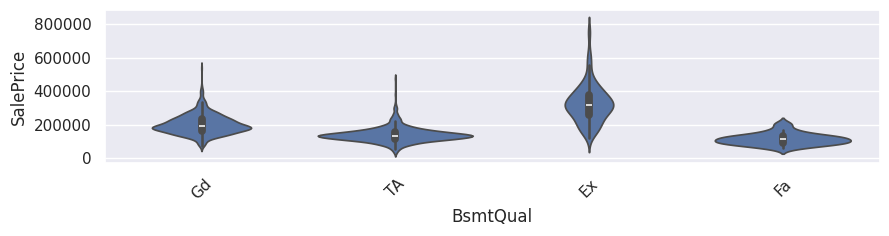

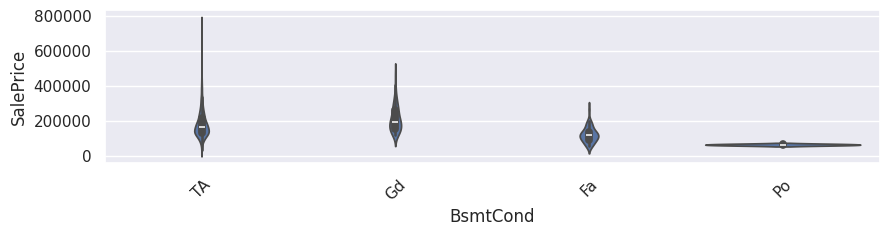

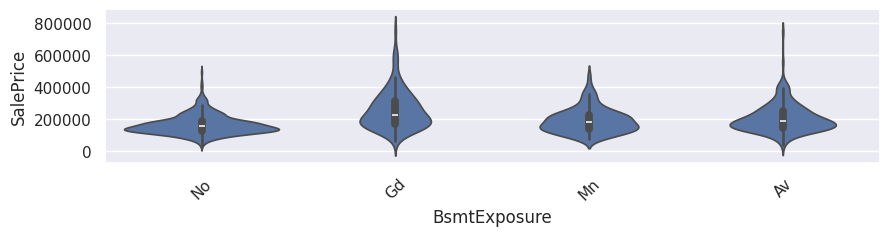

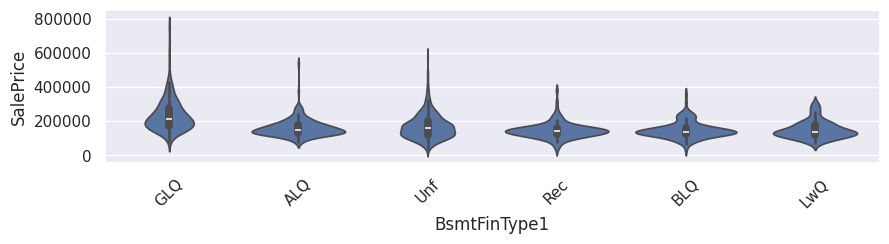

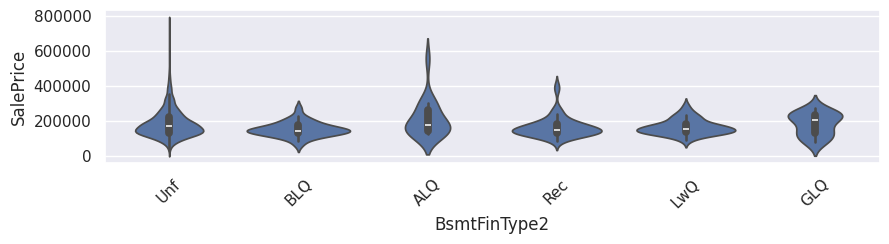

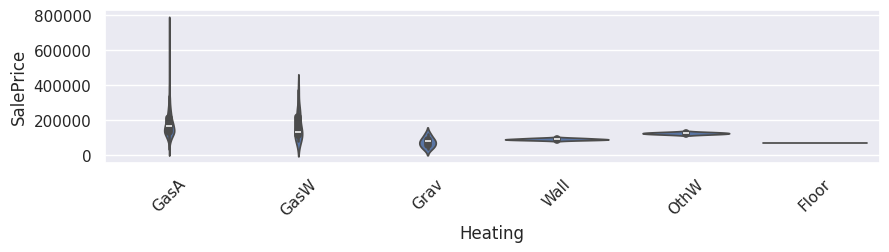

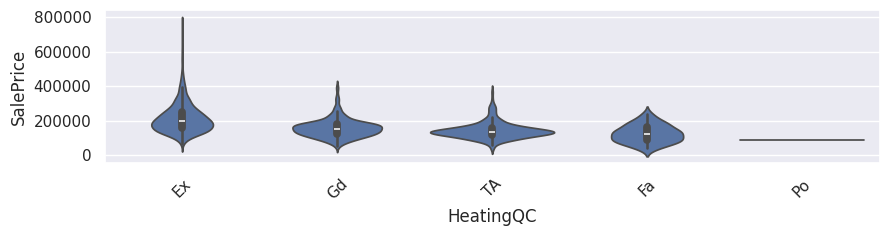

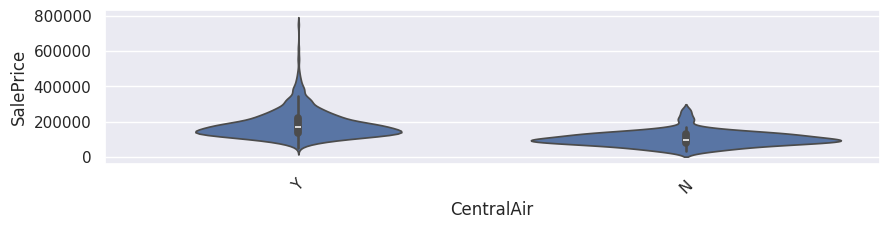

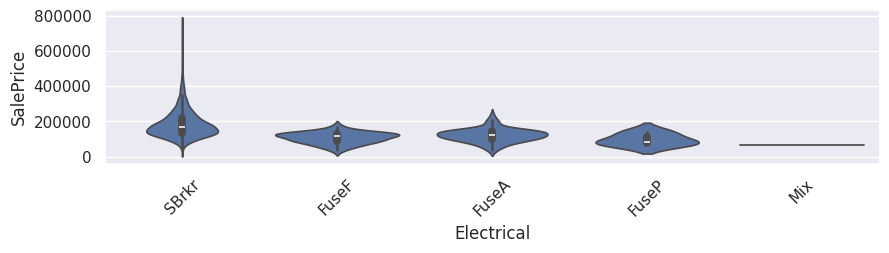

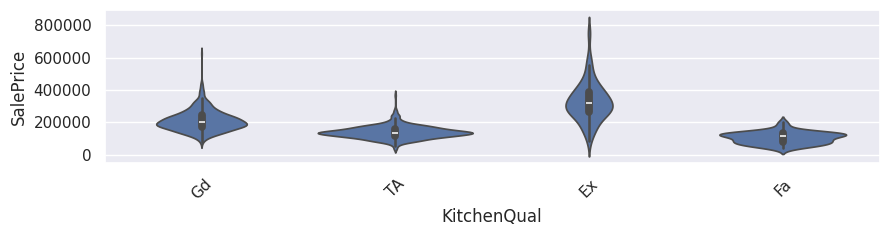

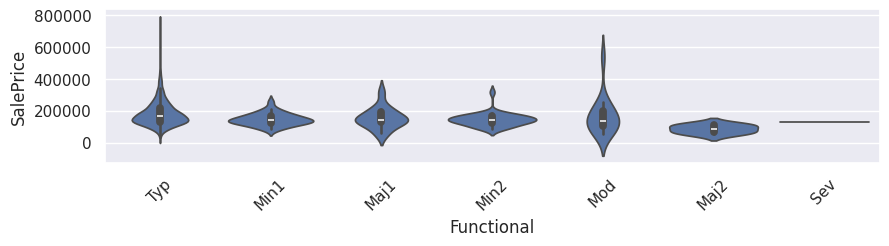

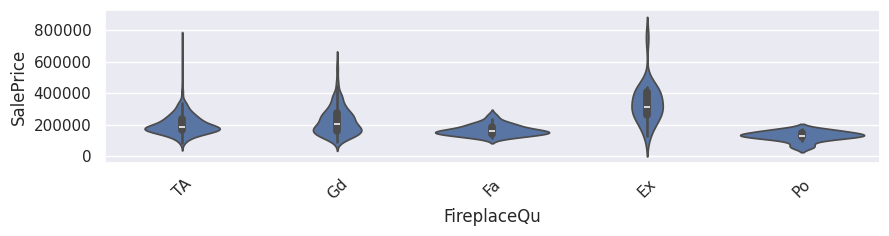

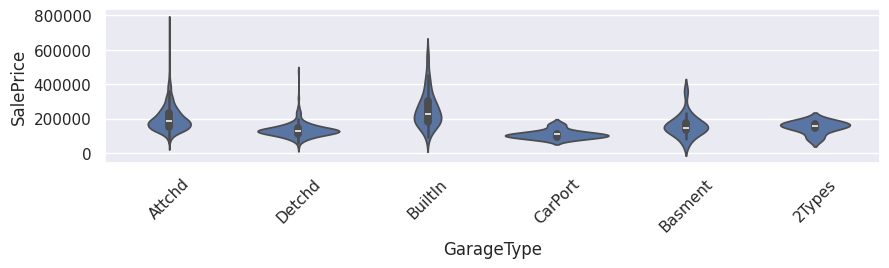

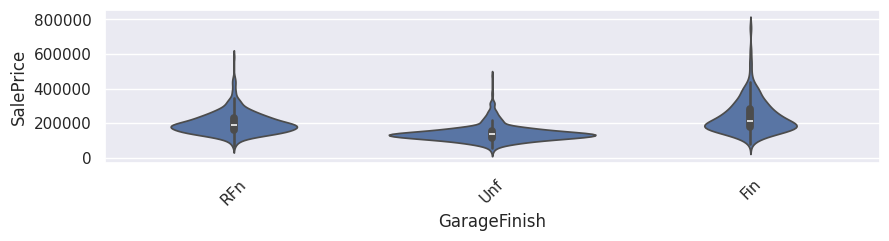

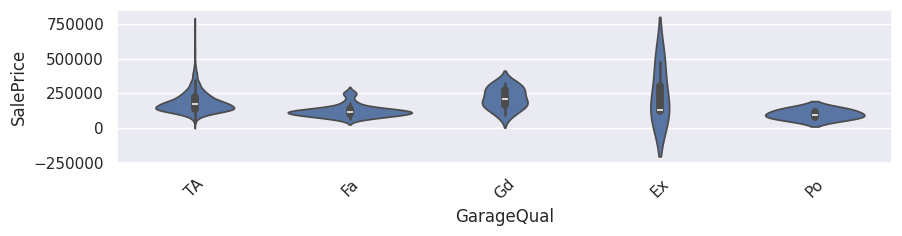

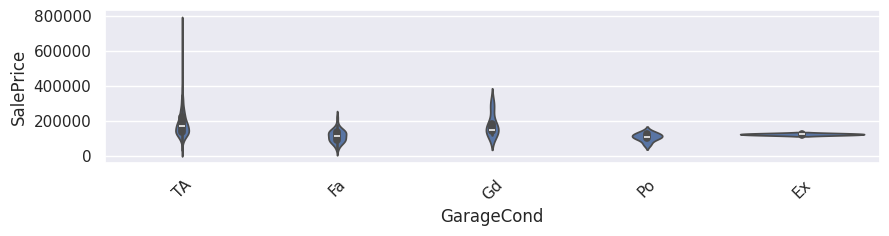

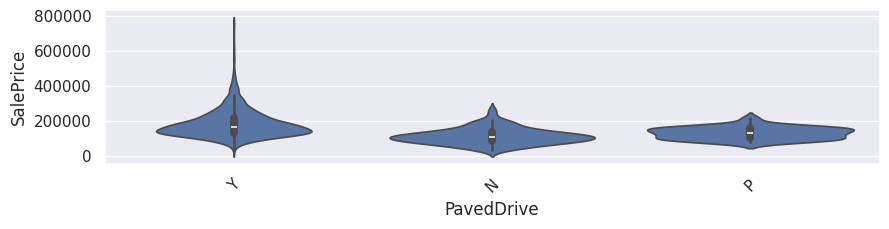

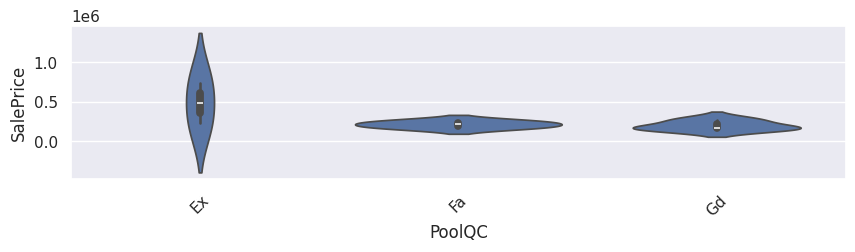

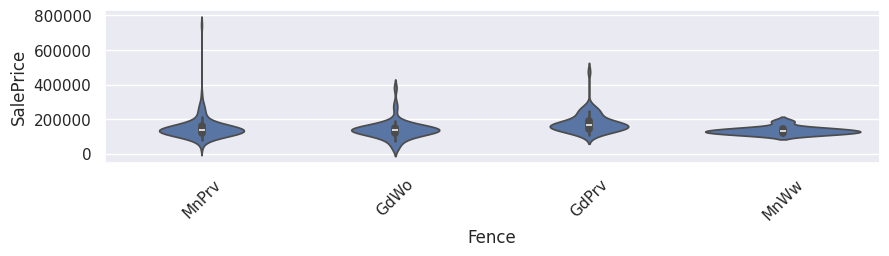

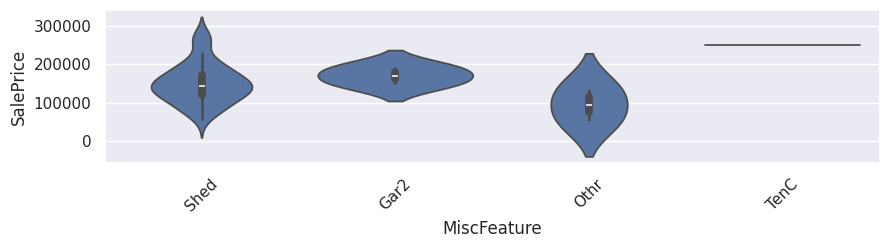

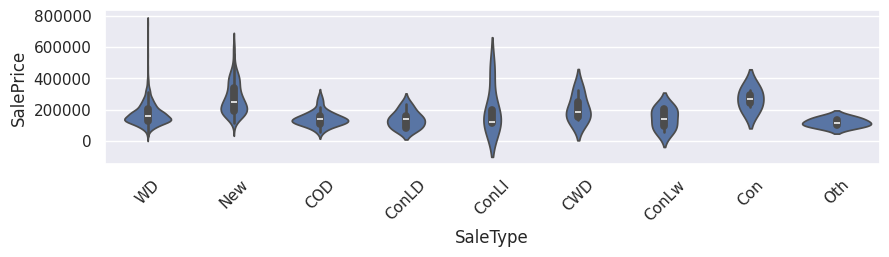

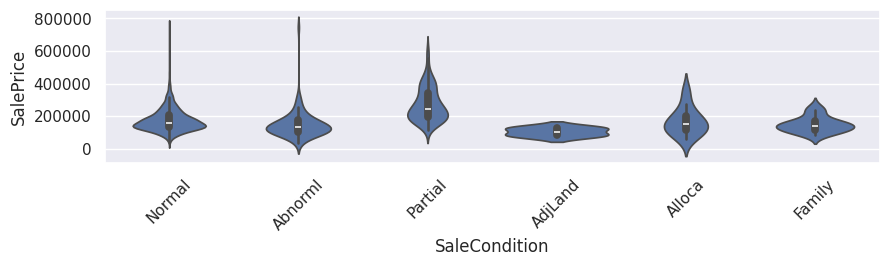

<Figure size 640x480 with 0 Axes>

In [ ]:
cat_col_sel = selector(dtype_exclude=['int64','float64'])
cat_col = cat_col_sel(df)

for column,i in zip(cat_col[1:],range(len(cat_col[1:]))):
  plt.figure(figsize=(10,100))
  plt.subplot(len(cat_col[1:]),1,i+1)
  sns.violinplot(x=df[column],y=df['SalePrice'])
  plt.xlabel(column)
  plt.ylabel('SalePrice')
  plt.xticks(rotation=45)
  plt.show()

plt.tight_layout()

# Creating Preprocessor

In [ ]:
def split_X_y(df):
    X = df.drop('SalePrice',axis=1)
    y = df['SalePrice']
    return X,y

class preprocessor:

  def __init__(self):
    self.Output_dataframe = None
    self.categorical_columns = []
    self.numerical_columns = []
    self.discrete_numerical_columns = []


  def preprocess_dataframe(self,df1):

    df = df1.copy()

    #Drop id column
    df.drop(['Id'],axis=1,inplace=True)

    #Convert 'MSSubClass' and 'MoSold' to categorical features
    df['MSSubClass'] = df['MSSubClass'].apply(lambda x: str(x))
    df['MoSold'] = df['MoSold'].apply(lambda x: str(x))

    #Define year-related features
    year_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

    #Convert year feature to age feature
    for column in year_columns:
        new_name = 'AgeOf'+column
        df[new_name] = df[column].apply(lambda x: (dt.datetime.now().year-x))
        df.drop(column,axis=1,inplace=True)

    for column in df:
      if df[column].isnull().sum()/len(df[column])*100 < 80:
        df.drop(column, axis=1)

    self.Output_dataframe = df

    #Define discrete numerical features
    discrete_numerical_columns = ['OverallQual','OverallCond','BsmtFullBath',
                          'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                          'KitchenAbvGr','TotRmsAbvGrd','Fireplaces']


    #Split Categorical and numerical features
    categorical_column_selector = selector(dtype_include='object')
    numerical_column_selector = selector(dtype_exclude='object')

    categorical_columns = categorical_column_selector(df)
    numerical_columns = numerical_column_selector(df)

    #Remove discrete numerical features from numerical features
    continuous_numerical_columns = [x for x in numerical_columns if x not in discrete_numerical_columns]

    #Confirm the total number of features matches the number of features in df
    try:
        total = len(categorical_columns) + len(continuous_numerical_columns) + len(discrete_numerical_columns)
        if total != len(df.columns):
            raise ValueError(f"Total number of columns not matching, expected {len(df.columns)}, got {total}")
    except ValueError as ve:
        print(ve)

    self.categorical_columns = categorical_columns
    self.continuous_numerical_columns = continuous_numerical_columns
    self.discrete_numerical_columns = discrete_numerical_columns

    return self.Output_dataframe

In [ ]:
X,y = split_X_y(df)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

pp = preprocessor()
X_train_pp = pp.preprocess_dataframe(X_train)

In addition to standard metric i.e. R2 score for regression, we will define an additional metric called log_RMSE which is RMSE between logs of actual and predicted target values.

In [ ]:
def log_RMSE(y_test,y_pred):
  return mean_squared_error(np.log(1+y_test),np.log(1+y_pred))**0.5

# LinearRegression



In [ ]:
def generate_pipeline_slr(categorical_columns,continuous_numerical_columns,discrete_numerical_columns):

    #Define preprocessing pipeline
    continuous_numerical_transformer = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler()),
        ('pca',PCA())
    ])

    discrete_numerical_transformer = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('scaler',StandardScaler()),
        ('pca',PCA())
    ])

    categorical_transformer = Pipeline([
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('continuous_num',continuous_numerical_transformer,continuous_numerical_columns),
        ('discrete_num',discrete_numerical_transformer,discrete_numerical_columns),
        ('cat',categorical_transformer,categorical_columns)
    ])

    pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression(fit_intercept=True))
    ])
    return pipe

In [ ]:
pipe_slr = generate_pipeline_slr(pp.categorical_columns,pp.continuous_numerical_columns,pp.discrete_numerical_columns)
pipe_slr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'GarageCars',
                                                   'GarageArea...
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir', ...])])),
                ('regressor', LinearRegression())])

In [ ]:
pipe_slr.fit(X_train_pp,y_train)
y_train_pred_slr = pipe_slr.predict(X_train_pp)

X_test_pp = pp.preprocess_dataframe(X_test)
y_test_pred_slr = pipe_slr.predict(X_test_pp)

print(f"R2 score for SLR on train data : {pipe_slr.score(X_train_pp,y_train):.3f}")
print(f"R2 score for SLR on test data : {pipe_slr.score(X_test_pp,y_test):.3f}\n")
print(f"log_RMSE for SLR on train data : {log_RMSE(y_train,y_train_pred_slr):.3f}")
print(f"log_RMSE for SLR on test data : {log_RMSE(y_test,y_test_pred_slr):.3f}")

R2 score for SLR on train data : 0.937
R2 score for SLR on test data : 0.889

log_RMSE for SLR on train data : 0.104
log_RMSE for SLR on test data : 0.184


# SGDRegressor

Let us create a Stochastic Gradient Descent (SGD) Regressor with Randomized Search Cross-Validation of Hyperparameters.

In [ ]:
def generate_pipeline_sgd(categorical_columns,continuous_numerical_columns,discrete_numerical_columns):

    #Define preprocessing pipeline
    continuous_numerical_transformer = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler()),
        ('pca',PCA())
    ])

    discrete_numerical_transformer = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('scaler',StandardScaler()),
        ('pca',PCA())
    ])

    categorical_transformer = Pipeline([
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('continuous_num',continuous_numerical_transformer,continuous_numerical_columns),
        ('discrete_num',discrete_numerical_transformer,discrete_numerical_columns),
        ('cat',categorical_transformer,categorical_columns)
    ])

    pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',SGDRegressor(max_iter=10000,warm_start=True,fit_intercept=True, random_state=42))
    ])
    return pipe

In [ ]:
pipe_sgd = generate_pipeline_sgd(pp.categorical_columns,pp.continuous_numerical_columns,pp.discrete_numerical_columns)
pipe_sgd

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'GarageCars',
                                                   'GarageArea...
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir', ...])])),
                ('regressor',
                 SGDRegressor(max_iter=10000, random_state=42,
                              warm_start=True))])

RandomizedSearchCV

In [ ]:
param_grid = {
    'regressor__penalty': ['l2','l1','elasticnet'],
    'regressor__alpha': [0.001,0.01,0.1,1.0,10],
    'regressor__l1_ratio':[0.10,0.15,0.20,0.25],
    'regressor__learning_rate':['constant','optimal','invscaling']
}

# grid_search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=4)
# grid_search.fit(X_train_pp,y_train)

# print(f"Best params:")
# for param in grid_search.best_params_:
#   print(f"{param} : {grid_search.best_params_[param]}")
# print(f"\nInternal CV score: {grid_search.best_score_:.3f}")

random_search = RandomizedSearchCV(pipe_sgd,param_grid,n_jobs=-1,cv=5,random_state=42)
random_search.fit(X_train_pp,y_train)

print(f"Best params:")
for param in random_search.best_params_:
  print(f"{param} : {random_search.best_params_[param]}")
print(f"\nInternal CV score: {random_search.best_score_:.3f}")

Best params:
regressor__penalty : l2
regressor__learning_rate : invscaling
regressor__l1_ratio : 0.15
regressor__alpha : 0.001

Internal CV score: 0.810


In [ ]:
y_train_pred_sgd = random_search.best_estimator_.predict(X_train_pp)
y_test_pred_sgd = random_search.best_estimator_.predict(X_test_pp)

print(f"R2 score for SGD on train data : {random_search.best_estimator_.score(X_train_pp,y_train):.3f}")
print(f"R2 score for SGD on test data : {random_search.best_estimator_.score(X_test_pp,y_test):.3f}\n"),
print(f"log_RMSE for SGD on train data : {log_RMSE(y_train,y_train_pred_sgd):.3f}")
print(f"log_RMSE for SGD on test data : {log_RMSE(y_test,y_test_pred_sgd):.3f}")

R2 score for SGD on train data : 0.872
R2 score for SGD on test data : 0.847

log_RMSE for SGD on train data : 0.136
log_RMSE for SGD on test data : 0.166


# Final Results

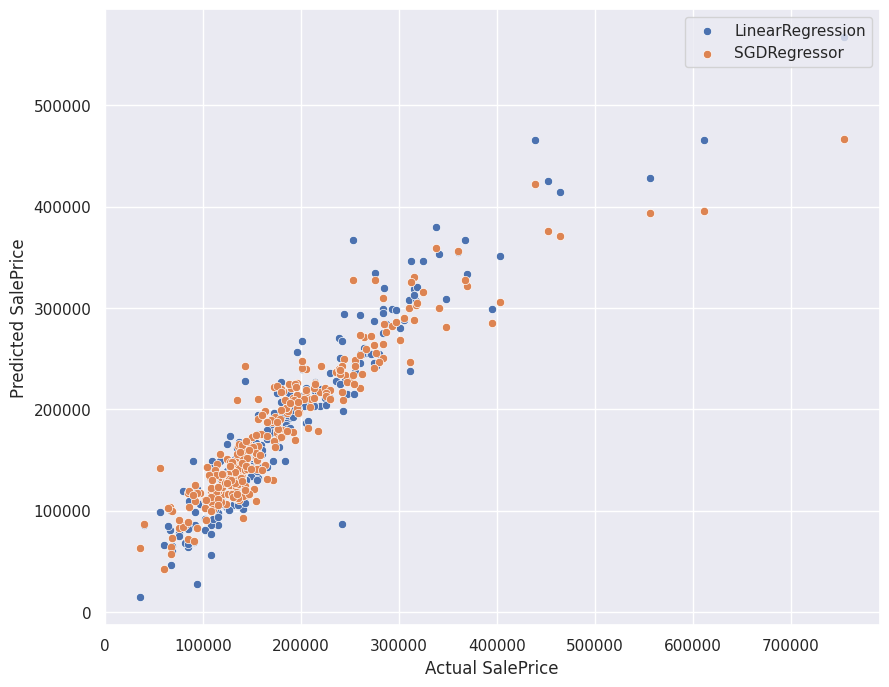

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test,y=y_test_pred_slr,label='LinearRegression')
sns.scatterplot(x=y_test,y=y_test_pred_sgd,label='SGDRegressor')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend(loc='upper right')

Amongst the two models i.e. Simple Linear Regressor (SLR) and SGD Regressor, the SLR seems to be more accurate in terms of predictions.